In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
DATA_DIR = r"datasets/fruits/fruits-360_100x100/fruits-360/Training"
IMG_SIZE = 100
BATCH_SIZE = 32
EPOCHS = 30
TEST_SPLIT = 0.3
MODEL_PATH = "models/fruits_cnn.keras"

In [ ]:
# Rescale pixel values to [0,1] and split into train/test via validation_split
datagen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=TEST_SPLIT)
# Training generator (70%)
train_generator = datagen.flow_from_directory(DATA_DIR, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical', subset='training', shuffle=True)
# Testing generator (30%)
test_generator = datagen.flow_from_directory(DATA_DIR, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical', subset='validation', shuffle=False)
num_classes = train_generator.num_classes
print("Number of classes (output units):", num_classes)
print("Class indices:", train_generator.class_indices)

Found 89867 images belonging to 245 classes.
Found 38385 images belonging to 245 classes.
Number of classes (output units): 245
Class indices: {'Apple 10': 0, 'Apple 11': 1, 'Apple 12': 2, 'Apple 13': 3, 'Apple 14': 4, 'Apple 17': 5, 'Apple 18': 6, 'Apple 19': 7, 'Apple 5': 8, 'Apple 6': 9, 'Apple 7': 10, 'Apple 8': 11, 'Apple 9': 12, 'Apple Braeburn 1': 13, 'Apple Core 1': 14, 'Apple Crimson Snow 1': 15, 'Apple Golden 1': 16, 'Apple Golden 2': 17, 'Apple Golden 3': 18, 'Apple Granny Smith 1': 19, 'Apple Pink Lady 1': 20, 'Apple Red 1': 21, 'Apple Red 2': 22, 'Apple Red 3': 23, 'Apple Red Delicious 1': 24, 'Apple Red Yellow 1': 25, 'Apple Red Yellow 2': 26, 'Apple Rotten 1': 27, 'Apple hit 1': 28, 'Apple worm 1': 29, 'Apricot 1': 30, 'Avocado 1': 31, 'Avocado Black 1': 32, 'Avocado Black 2': 33, 'Avocado Green 1': 34, 'Avocado ripe 1': 35, 'Banana 1': 36, 'Banana 3': 37, 'Banana 4': 38, 'Banana Lady Finger 1': 39, 'Banana Red 1': 40, 'Beans 1': 41, 'Beetroot 1': 42, 'Blackberrie 1': 43

In [4]:
model = models.Sequential()
# Input layer: Conv2D
model.add(layers.Conv2D(filters=16, kernel_size=(2, 2), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Second Conv block
model.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Two Conv layers with 64 filters + pooling
model.add(layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Dropout 0.3
model.add(layers.Dropout(0.3))
# Flatten
model.add(layers.Flatten())
# Fully connected layer
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dropout(0.4))
# Output layer: softmax over num_classes
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

c:\Users\mosta\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 99, 99, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 23, 23, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │       240,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 245)            │        36,995 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,137 (1.16 MB)

 Trainable params: 304,137 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

Epoch 1/30
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 1074s 382ms/step - accuracy: 0.7498 - loss: 0.8015 - val_accuracy: 0.8203 - val_loss: 0.6759
Epoch 2/30
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 544s 194ms/step - accuracy: 0.8827 - loss: 0.3531 - val_accuracy: 0.8434 - val_loss: 0.6291
Epoch 3/30
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 141s 50ms/step - accuracy: 0.9194 - loss: 0.2431 - val_accuracy: 0.8718 - val_loss: 0.5426
Epoch 4/30
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 141s 50ms/step - accuracy: 0.9369 - loss: 0.1954 - val_accuracy: 0.8806 - val_loss: 0.5335
Epoch 5/30
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 139s 50ms/step - accuracy: 0.9452 - loss: 0.1681 - val_accuracy: 0.8995 - val_loss: 0.4432
Epoch 6/30
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 141s 50ms/step - accuracy: 0.9526 - loss: 0.1474 - val_accuracy: 0.8946 - val_loss: 0.5342
Epoch 7/30
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 140s 50ms/step - accuracy: 0.9581 - loss: 0.1349 - val_accuracy: 0.9020 - val_loss: 0.4844
Epoch 8/30
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 139s 50ms/step - accurac

In [13]:
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")


Test accuracy: 0.9280


In [14]:
# True labels from generator
y_true = test_generator.classes  # integer class indices
# Predicted probabilities
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)
# classification report (precision/recall/F1)
target_names = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step

Confusion Matrix:
[[121   0   0 ...   0   0   0]
 [  0 100   0 ...   0   0   0]
 [  0   0  47 ...   0   0   0]
 ...
 [  0   0   0 ...  72   0   0]
 [  0   0   0 ...   0  20  23]
 [  0   0   0 ...   0   0 114]]

Classification Report:
                           precision    recall  f1-score   support

                 Apple 10       1.00      0.58      0.73       209
                 Apple 11       1.00      0.78      0.87       129
                 Apple 12       1.00      0.34      0.51       139
                 Apple 13       1.00      1.00      1.00       209
                 Apple 14       1.00      0.86      0.92       139
                 Apple 17       1.00      0.84      0.91       183
                 Apple 18       0.97      0.82      0.89       217
                 Apple 19       1.00      1.00      1.00       218
                  Apple 5       1.00      1.00      1.00       132
                  Apple 6       1.00      1.00   

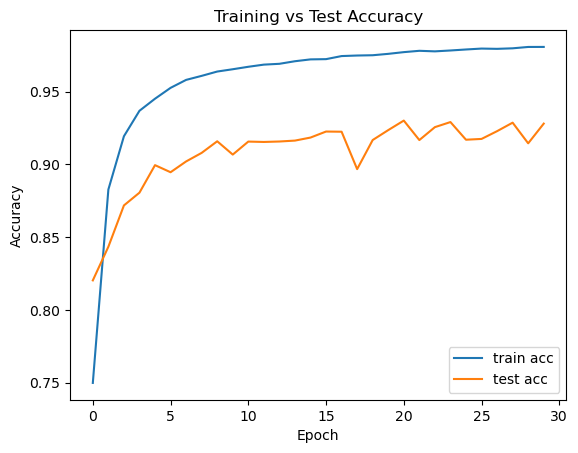

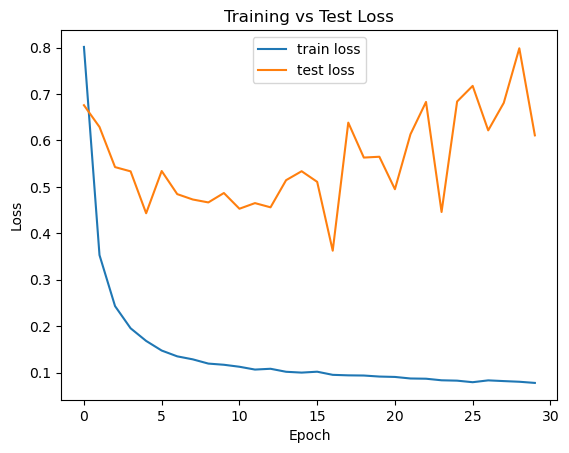

In [15]:
plt.figure()
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Test Accuracy')
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Test Loss')
plt.show()